# DT

# Gini

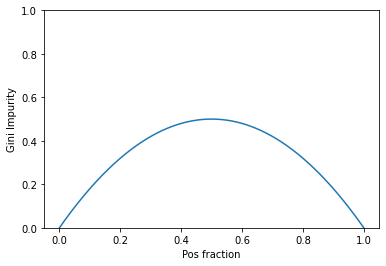

In [1]:
import matplotlib.pyplot as plt
import numpy as np

pos_fraction = np.linspace(0.,1.,1000)
gini = 1-pos_fraction**2-(1-pos_fraction)**2
plt.plot(pos_fraction,gini)
plt.ylim(0,1)
plt.xlabel("Pos fraction")
plt.ylabel("Gini Impurity")
plt.show()

지니 계수 함수 구현

In [3]:
def gini_impurity(labels):
    if not labels:
        return 0
    counts = np.unique(labels, return_counts=True)[1]
    fractions = counts/float(len(labels))
    return 1-np.sum(fractions**2)

In [4]:
gini_impurity([1,1,1,1])

0.0

In [5]:
gini_impurity([1,1,0,1,1,])

0.31999999999999984

In [6]:
gini_impurity([0,1])

0.5

# Entropy

C:\Users\KIST\AppData\Local\Temp/ipykernel_13792/3032412611.py:2: RuntimeWarning: divide by zero encountered in log2
  ent = -(pos_fraction*np.log2(pos_fraction)+(1-pos_fraction)*np.log2(1-pos_fraction))
C:\Users\KIST\AppData\Local\Temp/ipykernel_13792/3032412611.py:2: RuntimeWarning: invalid value encountered in multiply
  ent = -(pos_fraction*np.log2(pos_fraction)+(1-pos_fraction)*np.log2(1-pos_fraction))


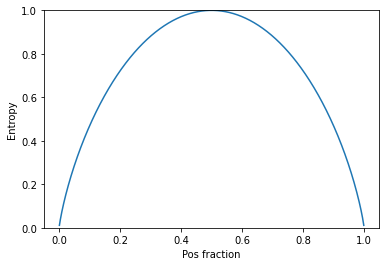

In [8]:

pos_fraction = np.linspace(0.,1.,1000)
ent = -(pos_fraction*np.log2(pos_fraction)+(1-pos_fraction)*np.log2(1-pos_fraction))

plt.plot(pos_fraction,ent)
plt.ylim(0,1)
plt.xlabel("Pos fraction")
plt.ylabel("Entropy")
plt.show()

In [14]:
def entropy(labels):
    if not labels:
        return 0
    counts = np.unique(labels,return_counts=True)[1]
    fractions = counts/float(len(labels))
    return -np.sum(fractions*np.log2(fractions))

In [15]:
entropy([1,1])

-0.0

In [16]:
entropy([0,1])

1.0

In [17]:
entropy([0,1,0])

0.9182958340544896

In [18]:
entropy([0,1,0,1,0])

0.9709505944546686

# Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {'max_depth':[3,10,None]}

random_forest = RandomForestClassifier(n_estimators=100,
                                      criterion='gini',min_samples_split = 30, n_jobs=-1)

grid_search = GridSearchCV(random_forest, parameters, n_jobs=-1, cv = 3, scoring='roc_auc')

grid_search.fit(one)

# CTR Prediction

# Get Data

In [6]:
import pandas as pd
train_file = "./train.gz"
train_df = pd.read_csv(train_file, compression='gzip')

In [7]:
train_df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [8]:
train_df.shape

(40428967, 24)

In [21]:
use_df = train_df.iloc[:20000,:]
use_df.shape

(20000, 24)

In [22]:
use_df.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [23]:
#use_df.drop(['id','hour','device_id','device_ip'],axis = 1, inplace = True)

In [24]:
train = use_df[:15000]
test = use_df[15000:]

In [25]:
train.to_csv("train.csv", index = False)
test.to_csv("test.csv", index = False)

In [28]:
import csv

def read_ad_click_data(n, offset=0):
    X_dict, y = [], []
    with open('train.csv', 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for i in range(offset):
            next(reader)
        i = 0
        for row in reader:
            i += 1
            y.append(int(row['click']))
            del row['click'], row['id'], row['hour'], row['device_id'], row['device_ip']#remove irrelevant features
            X_dict.append(dict(row))
            if i >= n:
                break
    return X_dict, y

In [29]:
X_dict_train, y_train = read_ad_click_data(15000)

In [30]:
print(X_dict_train[0])#first training sample (hashed values for privacy)
print(X_dict_train[1])#second training sample (hashed values for privacy)

{'C1': '1005', 'banner_pos': '0', 'site_id': '1fbe01fe', 'site_domain': 'f3845767', 'site_category': '28905ebd', 'app_id': 'ecad2386', 'app_domain': '7801e8d9', 'app_category': '07d7df22', 'device_model': '44956a24', 'device_type': '1', 'device_conn_type': '2', 'C14': '15706', 'C15': '320', 'C16': '50', 'C17': '1722', 'C18': '0', 'C19': '35', 'C20': '-1', 'C21': '79'}
{'C1': '1005', 'banner_pos': '0', 'site_id': '1fbe01fe', 'site_domain': 'f3845767', 'site_category': '28905ebd', 'app_id': 'ecad2386', 'app_domain': '7801e8d9', 'app_category': '07d7df22', 'device_model': '711ee120', 'device_type': '1', 'device_conn_type': '0', 'C14': '15704', 'C15': '320', 'C16': '50', 'C17': '1722', 'C18': '0', 'C19': '35', 'C20': '100084', 'C21': '79'}


In [31]:
from sklearn.feature_extraction import DictVectorizer
dict_one_hot_encoder = DictVectorizer(sparse=False)
X_train = dict_one_hot_encoder.fit_transform(X_dict_train)

In [32]:
X_dict_test, y_test = read_ad_click_data(5000)

In [33]:
X_test = dict_one_hot_encoder.transform(X_dict_test)

In [36]:
print(X_train.shape)#one hot encoded

(15000, 3244)


# Train Tree

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

parameters = {'max_depth':[3,10,None]}

dt = DecisionTreeClassifier(criterion='gini',min_samples_split = 30)

grid_search = GridSearchCV(dt, parameters, n_jobs=-1, cv = 3, scoring='roc_auc')

grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(min_samples_split=30),
             n_jobs=-1, param_grid={'max_depth': [3, 10, None]},
             scoring='roc_auc')

In [47]:
grid_search.best_params_

{'max_depth': 10}

In [48]:
decision_tree_best = grid_search.best_estimator_
pos_prob = decision_tree_best.predict_proba(X_test)[:,1]

In [49]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,pos_prob)

0.7158898121718174

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

parameters = {'max_depth':[3,10,None]}

rf = RandomForestClassifier(n_estimators=100,
                                      criterion='gini',min_samples_split = 30, n_jobs=-1)

grid_search = GridSearchCV(rf, parameters, n_jobs=-1, cv = 3, scoring='roc_auc')

grid_search.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(min_samples_split=30, n_jobs=-1),
             n_jobs=-1, param_grid={'max_depth': [3, 10, None]},
             scoring='roc_auc')

In [51]:
rf_best = grid_search.best_estimator_
pos_prob = rf_best.predict_proba(X_test)[:,1]

In [52]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,pos_prob)

0.8938162544664477